<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/L6_BSc_Data_Science_M7T3_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

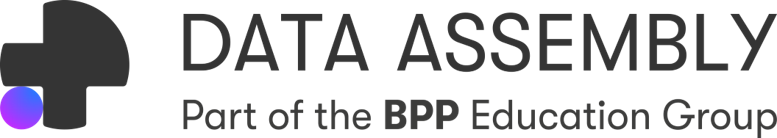

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Basics of HTML & URL Hacking](#section_1)
<br>2. [Introduction to XPath](#section_2)
<br>3. [Beautiful Soup](#section_3)
<br>4. [Creating Web Crawlers using Scrapy](#section_4)



<h2><font color="#AA00BB">Welcome to our workbook on Web Scraping in Python: A Practical Guide!</font></h2>

In data science, we often need to collect datasets from diverse sources on the web. Much of the most interesting data is unstructured and challenging to obtain through conventional means. Web scraping is a valuable skill for data scientists to extract and wrangle these hard-to-find datasets.

Let's start learning how to process text in Python.

In [ ]:
## Run the lesson setup here ##

!echo 'Hello Data Scientists \
Welcome to our lesson' > example.txt

!echo -e 'Hello Data Scientists \
\r\nWelcome to our lesson' > example2.txt

!echo 'This is file 1' > file1.txt

!echo 'This is file 2' > file2.txt

# **1. Basics of HTML**
[Return to contents](#contents)

Understanding the DOM (Document Object Model) in HTML is essential for web scraping because it allows us to locate and extract specific elements from web pages by navigating their structured representation in the DOM.

## **HTML Structure** *italicised text*

The DOM is a programming interface for web documents. It represents the structure of a document (like HTML) in a tree format, where each node of the tree is an object representing a part of the document. This allows programmers to manipulate the content and structure of the webpage programmatically.

Here are the main components and concepts of the DOM:

1. **Document**: The entry point into the web page's content. It's an object that represents the HTML document as a whole.

2. **Elements**: Elements correspond to HTML tags in the markup, like `<p>, <div>, <img>`, and so forth. Each HTML element is represented as a DOM element node.

3. **Text**: Text within the HTML elements are represented as Text nodes in the DOM tree.

4. **Attributes**: Attributes of the HTML tags are accessible in the DOM as well. They provide additional information about HTML elements.

5. **Nodes**: Each item (or object) in the DOM is called a node. There are several types of nodes, including element nodes, text nodes, attribute nodes, and even comment nodes.

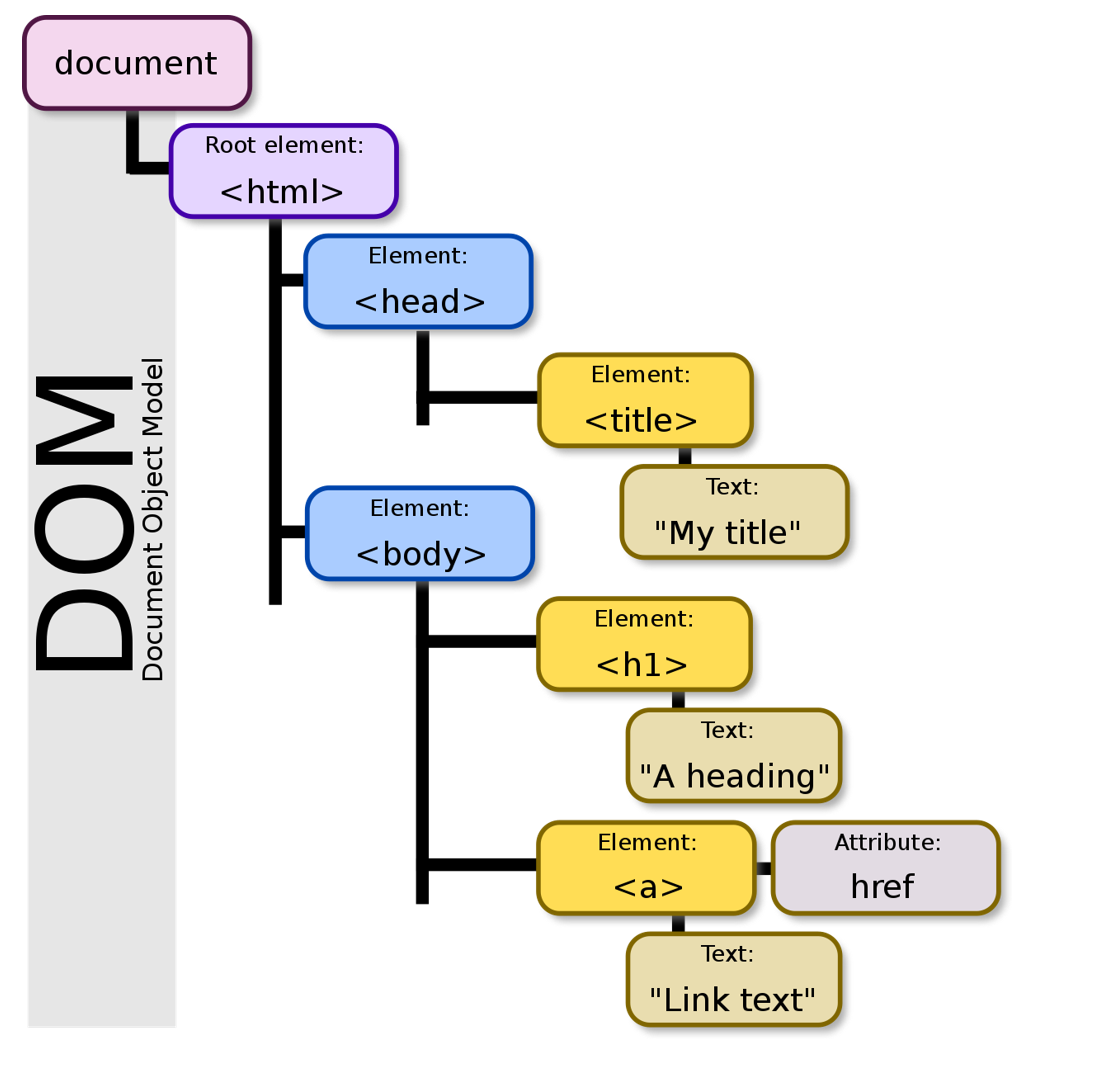

🔑Learn more at https://www.w3schools.com/html/

## **Let's create your first basic HTML site!**

Run this cell below, this writes the string 'html' to a file called `my_web_page.html`.

In [1]:
# Create a simple HTML file using python to create the *.html file
title = "My Web Page"
header = "Welcome to My Web Page!"
paragraph = "This is a simple Python-generated HTML page."

html = f"""
<html>
    <head>
        <title>{title}</title>
    </head>
    <body>
        <h1>{header}</h1>
        <p>{paragraph}</p>
    </body>
</html>
"""

# Write the HTML code to a file
with open("my_web_page.html", "w") as file:
    file.write(html)


Follow the instructions below to view your first web page after running the code above.

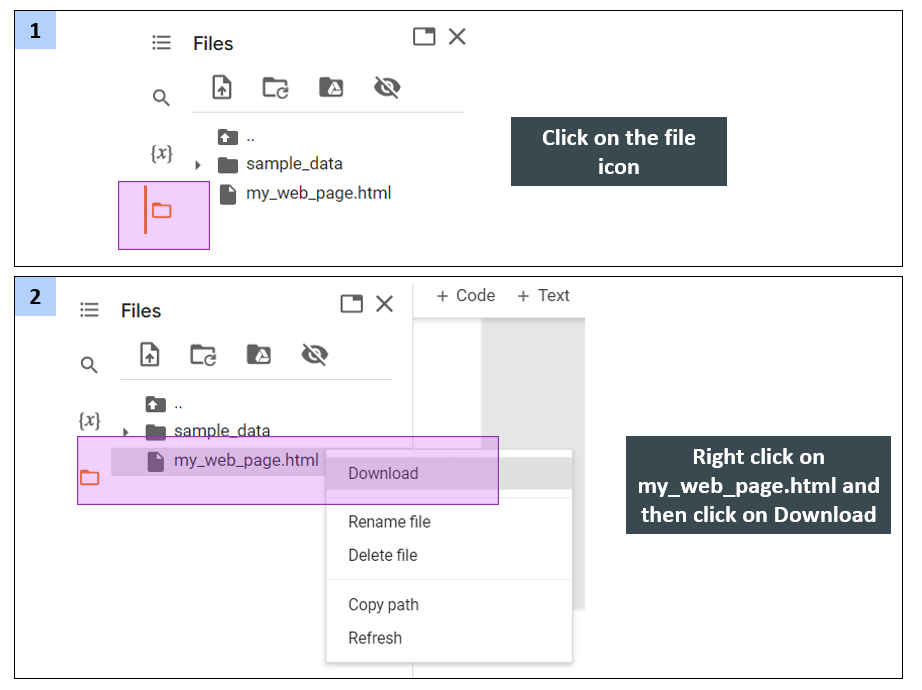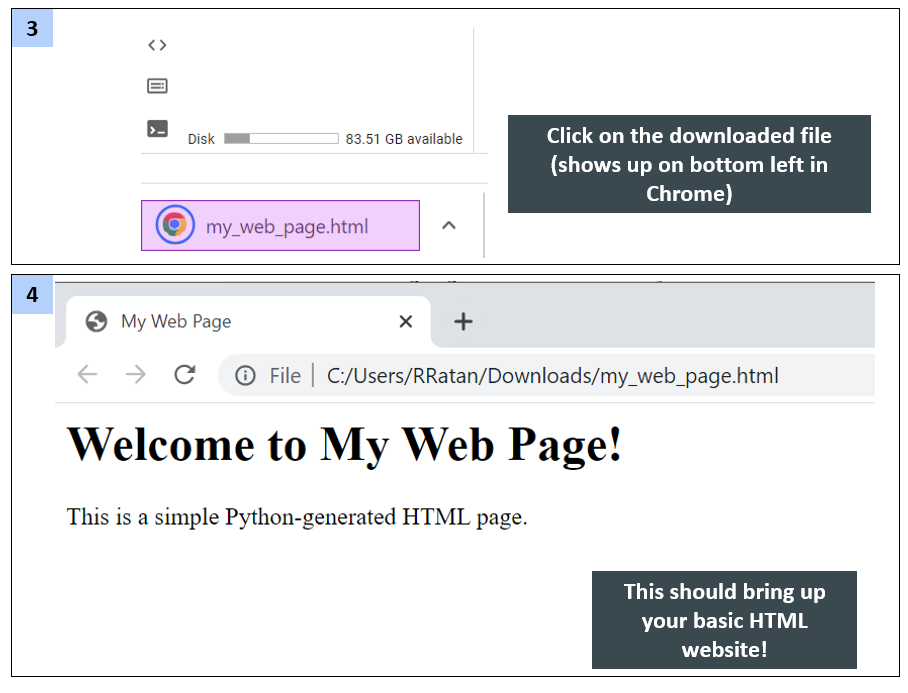

## **⌨️Exercise 1**
Make the following changes to your web page.
1. Change the title to "Welcome to Dataland"
2. Change the header (`h1`) to "Dataland is available!"
3. Add a second header using an `h2` style below `h1` and put "This has been created by YOUR_NAME here"
4. Change the HTML file name to `my_web_page_v2.html`


In [3]:
# Create a simple HTML file using python to create the *.html file
title = "Welcome to Dataland"
header = "Dataland is available!"
header2 = "This has been created by Lauren"
paragraph = "This is a simple Python-generated HTML page."

html = f"""
<html>
    <head>
        <title>{title}</title>
    </head>
    <body>
        <h1>{header}</h1>
        <h2>{header2}</h2>
        <p>{paragraph}</p>
    </body>
</html>
"""

# Write the HTML code to a file
with open("my_web_page_v2.html", "w") as file:
    file.write(html)

#**2. Introduction to XPath and XML**

**Xpath** ia important in web scraping because they provide powerful and flexible methods to target and extract specific elements from HTML documents, enabling efficient data extraction and automation tasks.

In this section we'll learn to use the **lxml library** which allows for easy handling of XML and HTML files, which is very useful in web scraping.

**`etree`** (**ElementTree**) is a module within lxml that provides a Pythonic API to access and manipulate XML and HTML data structures.It also provides powerful support for XPath, a query language for selecting nodes from an XML document.

### **XML files and XPath**

**XML files** are structured data files that use tags to represent information, and understanding how to parse them in web scraping is crucial because many websites provide data in XML format, and parsing allows us to extract relevant data efficiently and accurately from these sources.

**XPath** is a **query language** and syntax used to navigate and select elements within an XML or HTML document, allowing for precise and specific targeting of elements for extraction or manipulation during web scraping and other XML-related tasks.

## **A bookstore XML Database**

Imagine we've scraped data from an XML database.

Here we have created a sample of the file, you will be learning to use **Element Tree (etree)** from the **lxml** library to query this file.

Let's begin!

In [ ]:
from lxml import etree

# Our XML file showing a simple bookstore databse
root = etree.fromstring("""
<bookstore>
<book category="cooking">
  <title>Everyday Italian</title>
  <author>Giada De Laurentiis</author>
  <year>2005</year>
  <price>30.00</price>
</book>
<book category="web">
  <title>Learning XML</title>
  <author>Erik T. Ray</author>
  <year>2003</year>
  <price>39.95</price>
</book>
</bookstore>
""")

### **Select all book titles**

In [ ]:
# xpath method returns a list of elements that match the provided XPath expression
titles = root.xpath('//title')

# iterate through the list of title elements
for title in titles:
    # the text property of an element contains its textual content
    print(title.text)

Everyday Italian
Learning XML


### **Select the price of the second book**

In [ ]:
# XPath expression selects the price of the second book
# We use [0] at the end because xpath method returns a list and we want the first (and only) element of that list
price = root.xpath('//book[2]/price')[0]

# print the text content of the price element
print(price.text)

39.95


### **Select books published after 2003**

In [ ]:
# XPath expression selects the price of the second book
# We use [0] at the end because xpath method returns a list and we want the first (and only) element of that list
price = root.xpath('//book[2]/price')[0]

# print the text content of the price element
print(price.text)

39.95


### **Select the Category of the first book**

### **Select all authors**

In [ ]:
# xpath method with '//author' selects all author elements in the document
authors = root.xpath('//author')

# iterate through the list of author elements
for author in authors:
    # print the text content of each author element
    print(author.text)

Giada De Laurentiis
Erik T. Ray


## **⌨️Exercise**
1. Select the author of the second book.
2. Fill in the missing code below to print the category of each book.



```
# XPath expression selects all book elements
books = root.xpath('//book')

# iterate through the list of book elements
for book in books:
    # for each book, select the category attribute and print its value
    category = book.xpath('FILL_IN_MISSING_CODE_HERE')[0]
    print(category)
```




# **3. Introduction to BeautifulSoup and its importance in Web Scraping**

Beautiful Soup is a library in Python that is used to web scrape data from HTML and XML documents. It creates parse trees that can be used to extract data easily.

It's a fantastic tool for web scraping because it provides simple methods and Pythonic idioms for iterating, searching, and modifying the parse tree.

**Beautiful Soup and HTML**

As we saw above, HTML (Hypertext Markup Language) is the standard markup language for documents designed to be displayed in a web browser.

It consists of various tags and attributes, defining different parts of a webpage like headings, paragraphs, links, images, lists, etc.

**Beautiful Soup acts as an HTML parser**. It creates a parse tree from the HTML source code that can be used to extract information in a hierarchical and readable manner. This is especially handy if you need to pull out information from large HTML documents.

### **Let's quickly demostrate the power of BeautifulSoup and Scrape BBC's website for news headlines**

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.bbc.co.uk/news"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

headlines = soup.find_all('h3')

for headline in headlines:
    print(headline.get_text())

Australian beach 'object' is Indian space junk
Australian beach 'object' is Indian space junk
Afghan Taliban burn ‘immoral’ musical instruments
The man who could bring down Donald Trump
Cardi B throws microphone into crowd at gig
Our sun bears are not humans in disguise, insists zoo
The Texas town caught in America's border battle
Man saved after car flips in raging floodwaters
Canada out of World Cup after thumping by Australia
US nurse and child kidnapped in Haiti, says charity
British husband who killed wife in Cyprus walks free
Indigenous women and police clash in Peru protest
British husband who killed wife in Cyprus walks free
Indigenous women and police clash in Peru protest
Doomsday scenes in Pakistan blast, eyewitness says
Madonna: I feel so lucky to be alive
US junior racer White, 17, dies in training accident
US fans nervy ahead of crunch Portugal game
Japan thump Spain to book last-16 Norway tie
Zambia beat Costa Rica for first Women's World Cup win
Philippines ends 'magica

❓🤔 What do you notice about the above results?

**Hint**: It's a bit messy isn't it? Not all of the H3 headings are news headlines.

Let's view the commented code below and explain how both the Requests Library and BeautifulSoup work!

In [ ]:
# Import the required libraries
import requests                  # Used for making HTTP requests
from bs4 import BeautifulSoup    # Used for HTML parsing

# Specify the URL of the web page you want to scrape
url = "https://www.bbc.co.uk/news"

# Make a GET request to the specified URL
response = requests.get(url)

# Parse the HTML content of the page with BeautifulSoup
# 'html.parser' is the parser module to be used
soup = BeautifulSoup(response.text, 'html.parser')

# Use the find_all method to find all the 'h3' tags
# The 'h3' tags are usually used for subheadings in HTML
headlines = soup.find_all('h3')

# Iterate over the list of headlines
for headline in headlines:
    # Print the text inside each 'h3' tag using the get_text() method
    print(headline.get_text())

## **The Requests Library in Python**

The Requests library is used to send HTTP requests and handle the response in Python. It abstracts the complexities of making requests behind simple API, allowing you to send HTTP/1.1 requests.

**This is how we obtain the HTML before using BeautifulSoup to parse (extract) infomration from it.**

This diagram explains at a highlevle what the Requests library is doing:
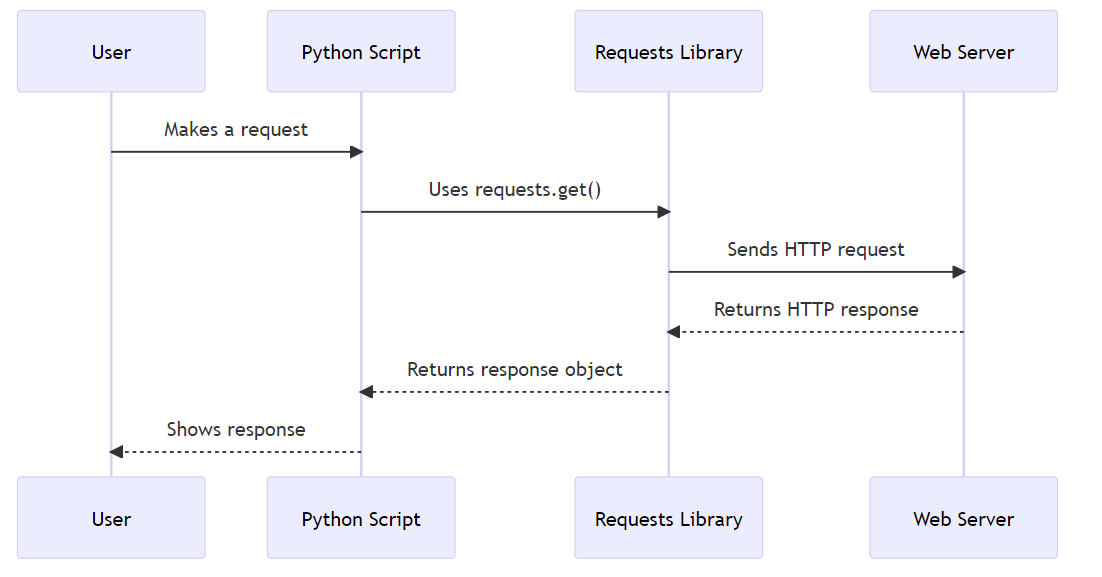

## **Understanding BeautifulSoup**

In the example below we are going to use a sample HTML file.

1. We create a 'soup' BeautifulSoup object, specifying that we want to use the html.parser for this file.
2. We then used the find_all() function to find all H3 tags in the HTML file.
3. We then iterated through all the returned H3 tags.

**Now let's look at the HTML file below:**

❓🤔 What do you notice?

In [ ]:
from bs4 import BeautifulSoup

# HTML string
html_doc = """
<html>
<head>
<title>Review Page</title>
</head>
<body>
  <div class="review">
    <h1 class="title">Product Review: FitConstructor Bike</h1>
    <div class="content">
      <p class="user">John Doe</p>
      <p>I recently purchased a FitConstructor Bike and it's been a game-changer. The bike is sturdy, reliable, and provides a great workout.</p>
    </div>
    <div class="rating">
      <p>Rating: 5/5</p>
    </div>
  </div>

  <div class="review">
    <h1 class="title">Product Review: SuperFit Treadmill</h1>
    <div class="content">
      <p class="user">Amy Lee</p>
      <p>The SuperFit Treadmill has been an excellent addition to my home gym. It really brings me to life!.</p>
    </div>
    <div class="rating">
      <p>Rating: 4.5/5</p>
    </div>
  </div>
</body>
</html>
"""

# Create a BeautifulSoup object
soup = BeautifulSoup(html_doc, 'html.parser')

### **There are 'div' tags in our file. What do they mean?**

**`<div>`** is a container tag in HTML that is used to structure and group similar sections of HTML content together. It doesn't convey any semantic meaning by itself, but is highly useful as a way to apply CSS styles to groups of content or to manipulate them with JavaScript.

The **class attribute** is a way to classify or categorise HTML elements. You can apply the same class to multiple elements, or multiple classes to the same element. It's primarily used for applying CSS styling and targeting elements in JavaScript or jQuery.

For instance, in the following HTML:
```
<div class="header">
  <h1>Welcome to My Site!</h1>
</div>
<div class="content">
  <p>This is a paragraph in the main content area.</p>
</div>
```

Here we have two `<div>` elements, one with a class of "header" and the other with a class of "content".

### **Now how to we use BeautifulSoup to targeting DOM Elements on the page?**

Beautiful Soup allows you to target DOM elements in an HTML page by using the `find` or `find_all` methods combined with the class name as a parameter, enabling extraction or manipulation of specific sections of the web content.

In [ ]:
# Print the title of the first review
first_review_title = soup.find('h1', class_='title')
print('First Review Title:', first_review_title.text)

First Review Title: Product Review: FitConstructor Bike


Notice how we can now query by tag (h1) and the class name (title). Let's now find all the users posting reviews.

In [ ]:
# Print all review authors
review_authors = soup.find_all('p', class_='user')
print('\nAll Review Authors:')
for author in review_authors:
    print(author.text)


All Review Authors:
John Doe
Amy Lee


We can even search within classes. See how we can search within the content class for all tags matching the `p` tag.

In [ ]:
# Print all review ratings
review_ratings = soup.find_all('div', class_='rating')
print('\nAll Review Ratings:')
for rating in review_ratings:
    print(rating.text.strip())


All Review Ratings:
Rating: 5/5
Rating: 4.5/5


## **⌨️Exercise**
1. Print all the review ratings on the product page.
2. Fill in the blank in the code below, we are trying to print only the text in each review.



```
# Print all review texts
# Assuming that the review text is always the second <p> tag inside the content div

review_texts = [div.find_all('p')[1] for div in soup.find_all('div', class_='FILL IN MISSING CODE HERE')]
print('\nAll Review Texts:')
for text in review_texts:
    print(text.text)
```



# **4. Creating Web Crawlers using Scrapy (OPTIONAL)**


Scrapy is an open-source Python framework designed specifically for web scraping and data extraction from websites.

It is a powerful tool that allows developers to build and scale complex **crawling projects** by handling the requests and responses, processing the data, and dealing with common tasks such as dealing with cookies, sessions and common web scraping techniques.

To use scrapy we first have to install it, let's begin!

**Note:**
- We will be running Bash commands in this example. Bash commands are instructions we type into the Bash shell, a command-line interface that interacts with the operating system.
- Bash commands are run by using the **!** operator at the start of a cell, this tells the interpreter that we are running bash and not Python code.

Here is a high level diagram illustratin how Scrapy Spiders work:
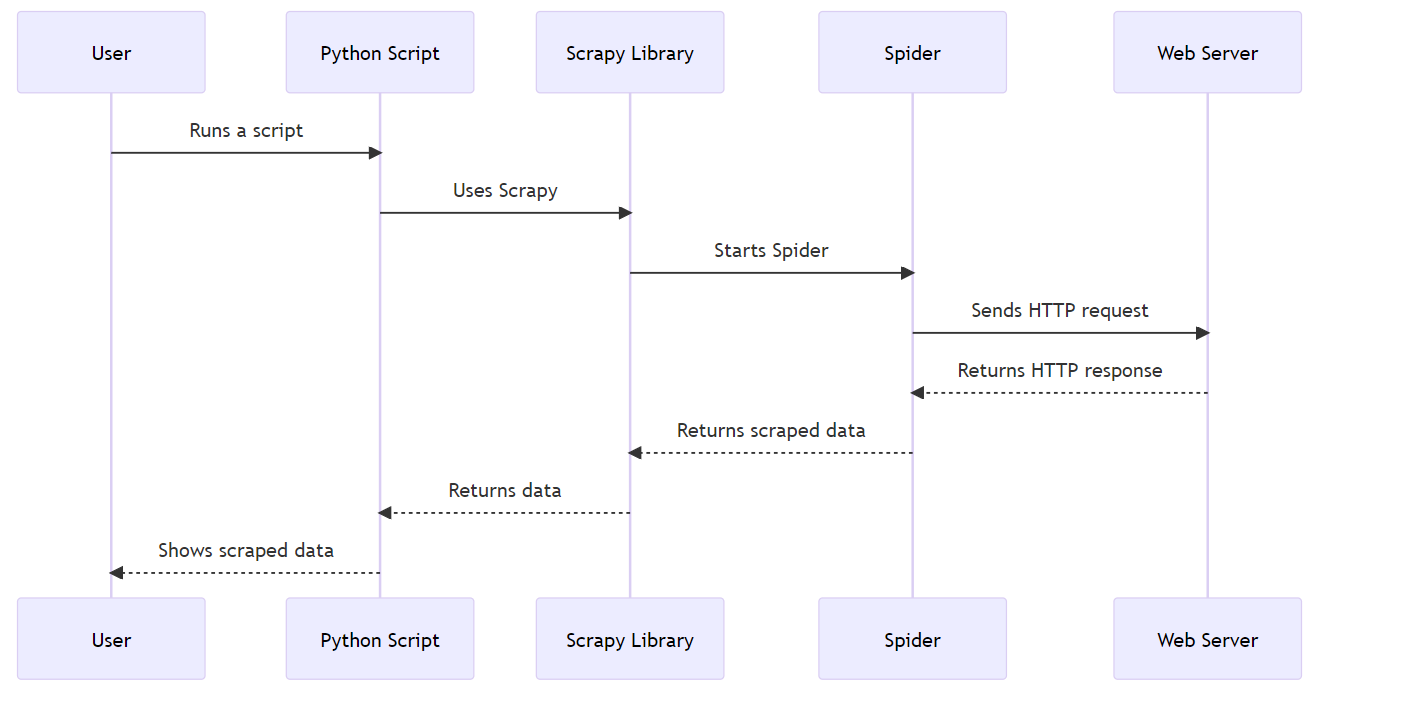

In [ ]:
# Install Scrapy
# Restart the runtime afterwards
!pip install scrapy

For this tutorial, let's choose to scrape data from a **fictional website - "Books to Scrape"** (http://books.toscrape.com). It is a safe-to-scrape website for learning and practicing web scraping. We will extract information about the books listed on this website, such as the book title, price, availability, and category.

#### **Create a new Scrapy project named books_scraper**

This creates a new directory with our crawler files, called **book_scraper**

In [ ]:
# Let's run the bash command below
!scrapy startproject books_scraper

New Scrapy project 'books_scraper', using template directory '/usr/local/lib/python3.10/dist-packages/scrapy/templates/project', created in:
    /content/books_scraper

You can start your first spider with:
    cd books_scraper
    scrapy genspider example example.com


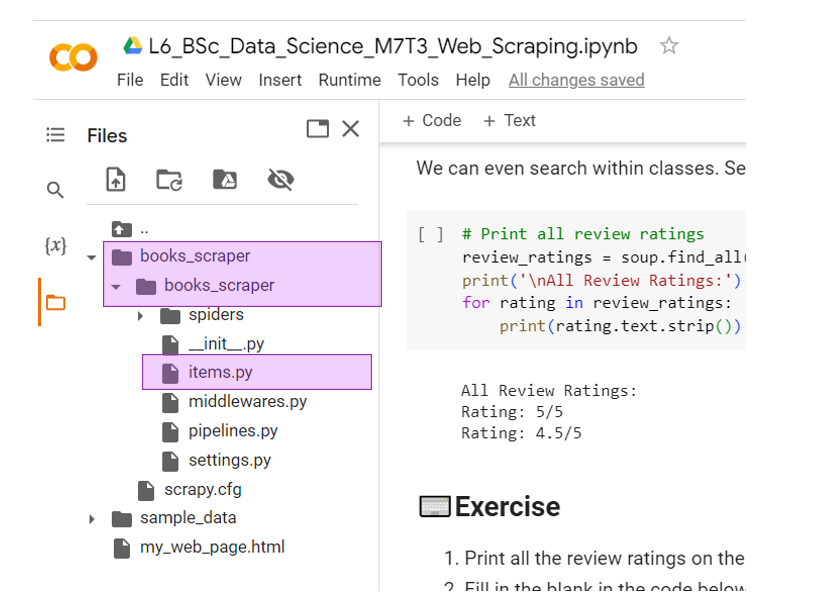

### **Then paste the code below into the items.py file**

In Colab we can double click on a file in the file explorer tool, this opens up a new window that allows us to edit the file.

Paste the code below into the items.py file.

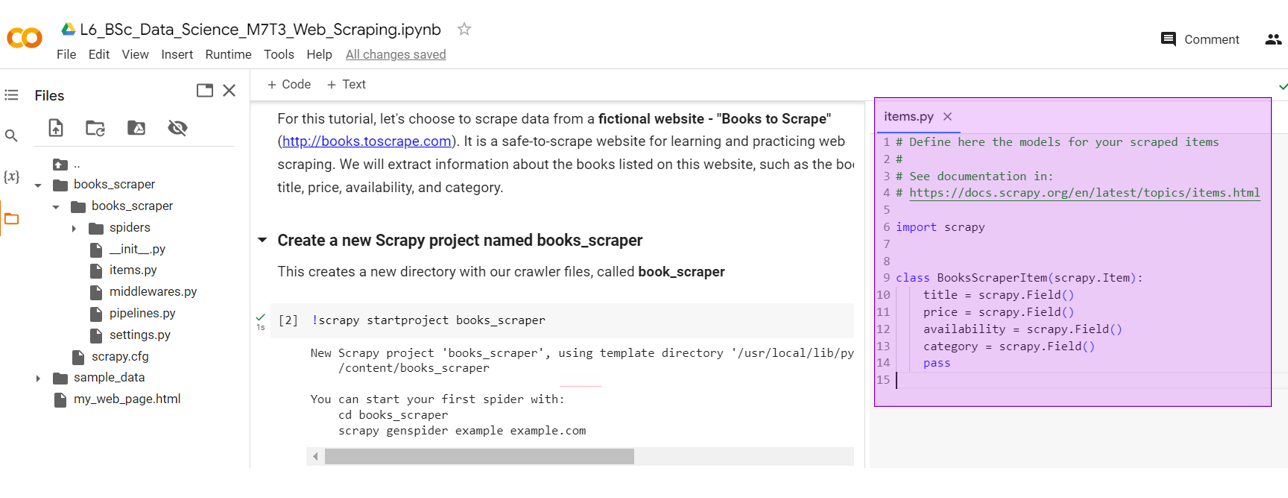

The code to insert into items.py

In [ ]:
# Define here the models for your scraped items
#
# See documentation in:
# https://docs.scrapy.org/en/latest/topics/items.html

import scrapy

class BooksScraperItem(scrapy.Item):
    title = scrapy.Field()
    price = scrapy.Field()
    availability = scrapy.Field()
    category = scrapy.Field()
    pass

### **Now let's create a Spider, this is a class that Scrapy uses to scrape the information from a website(s).**

Let's create a spider for our books website. Under the **spiders** directory, create a new Python file called **'books_spider.py'**

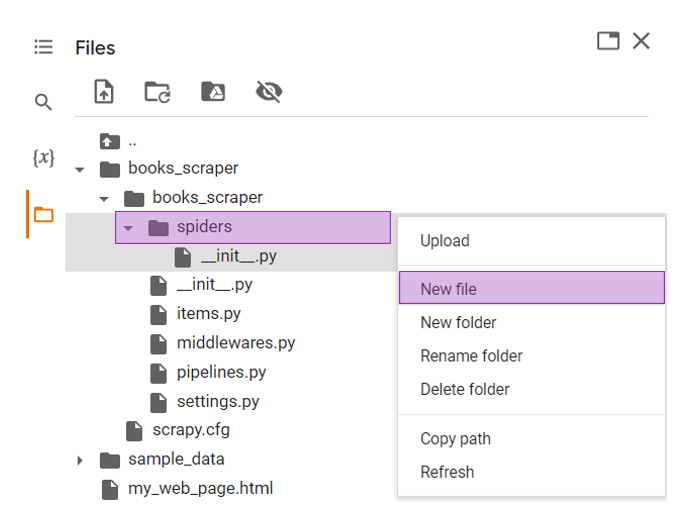

### **Code for our books_spider.py class**



In [ ]:
# Import necessary libraries
import scrapy
from books_scraper.items import BooksScraperItem  # Import the item class we defined in items.py

# Define the spider class
class BooksSpider(scrapy.Spider):
    name = 'books'  # Name of the spider, to be used when running from the command line
    start_urls = ['http://books.toscrape.com']  # The starting url(s), scrapy will begin to crawl from here

    # The parse method will be called for each of the start_urls
    def parse(self, response):
        # Loop through each book element on the page
        for book in response.css('article.product_pod'):
            # Create a new BooksScraperItem instance to store the scraped data
            item = BooksScraperItem()

            # Extract the title, price, availability, and category of each book using CSS selectors and XPaths
            item['title'] = book.css('h3 a::attr(title)').get()
            item['price'] = book.css('.price_color::text').get()
            item['availability'] = book.css('.availability::text').get().strip()
            item['category'] = book.xpath('../../preceding-sibling::h3/a/text()').get()

            # yield the filled item, Scrapy will process it (via pipelines) and handle the data as instructed
            yield item

        # Check if there is a next page. If so, yield a new request to the next page
        next_page = response.css('.next a::attr(href)').get()
        if next_page is not None:
            yield response.follow(next_page, self.parse)

Your book_spider.py should look like this:

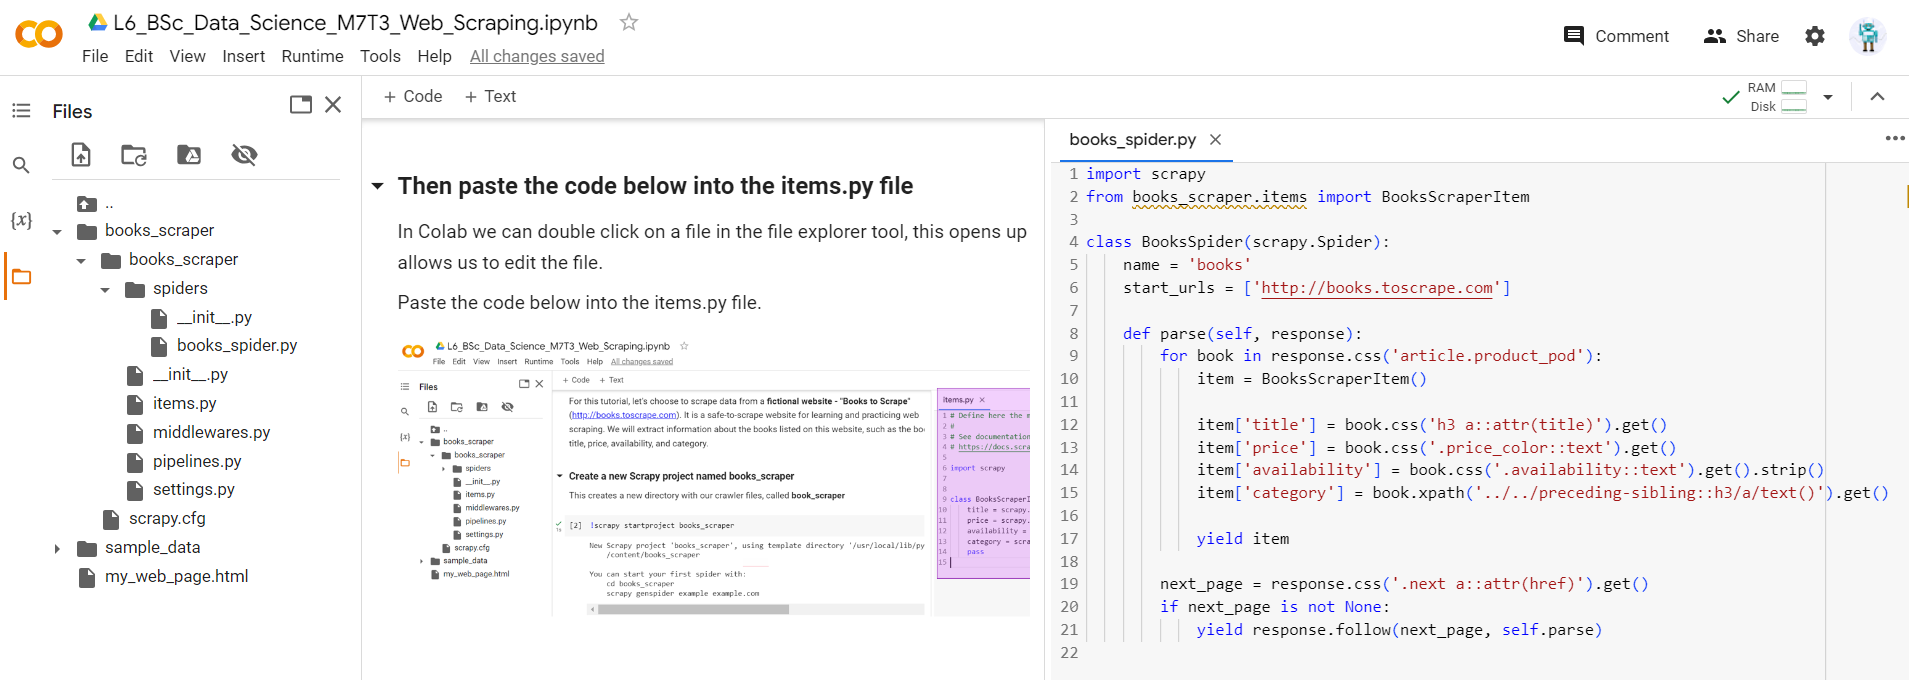

In the spider code above, **`start_urls`** contain the initial URLs to start crawling. The **`parse`** method will be called to handle the response downloaded for each request made. The response parameter is an instance of **`TextResponse`** that holds the page content and has further helpful methods to handle it.

The **`yield`** keyword is used in Scrapy instead of return to handle the data and keep the function open, allowing Scrapy to create an iterator over the items and process them asynchronously.

### **Now we're ready to run our Spider!!**

In [ ]:
# Navigate to our books_scaper directory
%cd books_scraper/

/content/books_scraper


In [ ]:
# Using the bash command below, let's start our scraper.
!scrapy crawl books

Streaming output truncated to the last 5000 lines.
{'availability': '',
 'category': None,
 'price': '£51.77',
 'title': 'A Light in the Attic'}
2023-07-31 17:41:29 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '',
 'category': None,
 'price': '£53.74',
 'title': 'Tipping the Velvet'}
2023-07-31 17:41:29 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '', 'category': None, 'price': '£50.10', 'title': 'Soumission'}
2023-07-31 17:41:29 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '',
 'category': None,
 'price': '£47.82',
 'title': 'Sharp Objects'}
2023-07-31 17:41:29 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '',
 'category': None,
 'price': '£54.23',
 'title': 'Sapiens: A Brief History of Humankind'}
2023-07-31 17:41:29 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability

###**What just happened under the hood?**
Scrapy schedules the **`scrapy.Request`** objects returned by the **`start_requests`** method of the Spider. Upon receiving a **`response`** for each one, it instantiates Response objects and calls the callback method associated with the request (in this case, the **`parse`** method) passing the response as argument.

### **We've just scarped the books.toscrape.com wesbite!**

But how do we store and view our scraped data files?


In [ ]:
!scrapy crawl books -o books.json

Streaming output truncated to the last 5000 lines.
 'price': '£51.77',
 'title': 'A Light in the Attic'}
2023-07-31 17:43:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '',
 'category': None,
 'price': '£53.74',
 'title': 'Tipping the Velvet'}
2023-07-31 17:43:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '', 'category': None, 'price': '£50.10', 'title': 'Soumission'}
2023-07-31 17:43:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '',
 'category': None,
 'price': '£47.82',
 'title': 'Sharp Objects'}
2023-07-31 17:43:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '',
 'category': None,
 'price': '£54.23',
 'title': 'Sapiens: A Brief History of Humankind'}
2023-07-31 17:43:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com>
{'availability': '',
 'category': None,
 'price': '£22

### This created a **books.json** file in our **books_scraper** directory
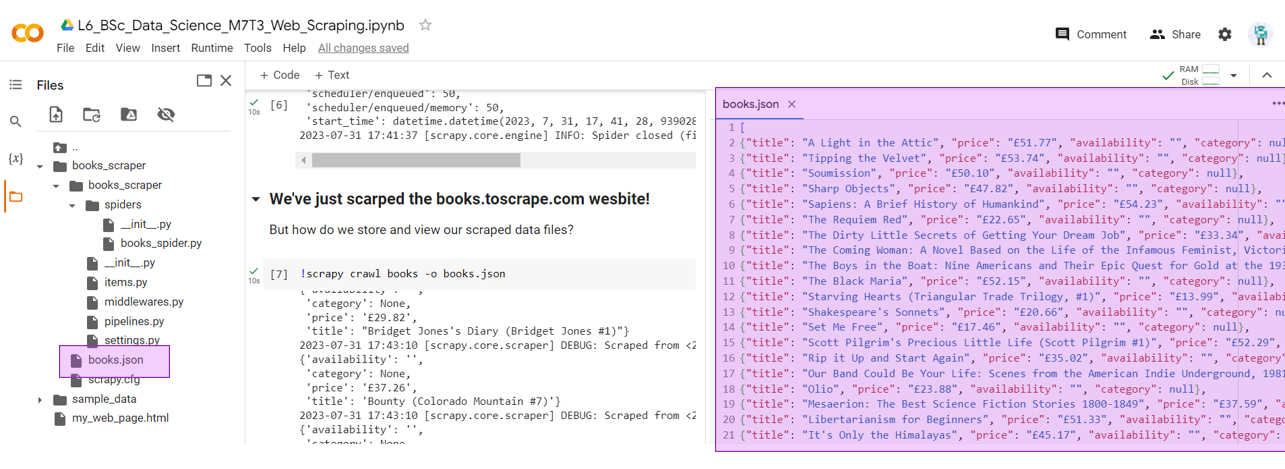

https://docs.scrapy.org/en/latest/intro/tutorial.html